In [7]:
import os
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
working = '../data/working'

In [39]:
with open(os.path.join(working, 'vols'+'.pickle'), 'rb') as fi:
    vols = pickle.load(fi, encoding='latin1')
vols = np.array(vols)

In [73]:
t = vols[:,0]
xt = np.linspace(t[0], t[-1], 100)

In [64]:
p_vol = []
p_der = []
for i in range(1,4):
    pars = np.polyfit(t, vols[:,i], 2)
    p_vol.append(np.poly1d(pars))
    p_der.append(np.poly1d([2.0*pars[0], pars[1]]))
    print('# ', i,':', *pars)

#  1 : -1.1517291718525314e-07 0.04386011790109366 2089.8021653910114
#  2 : 3.933027638849574e-06 0.027349364383053628 2059.884349993214
#  3 : 1.836483349147679e-06 0.034916083965467665 2078.3104997297855


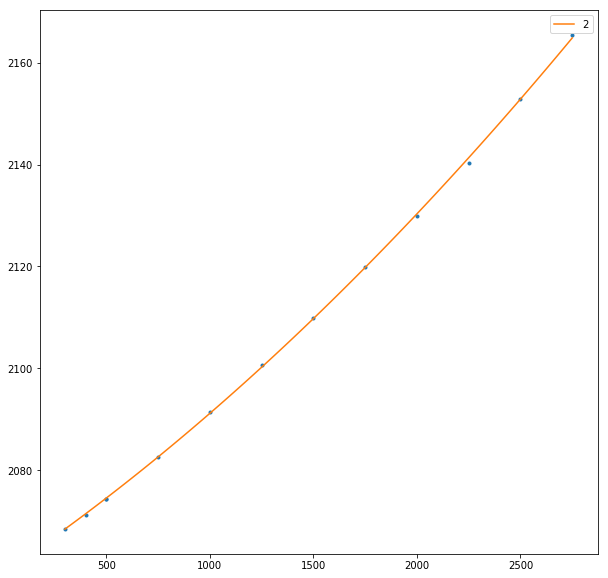

In [78]:
plt.figure(figsize=(10,10))
for i in range(2, 3):
    _ = plt.plot(t, vols[:,i], '.')
    _ = plt.plot(xt, p_vol[i-1](xt), '-', label=str(i))
plt.legend()

In [79]:
vol_exp = lambda t: 1 + (4.28*(t-273.15) + 0.00058*(t-273.15)**2)*1e-6
der_exp = lambda t: (4.28 + 2.*0.00058*(t-273.15))*1e-6

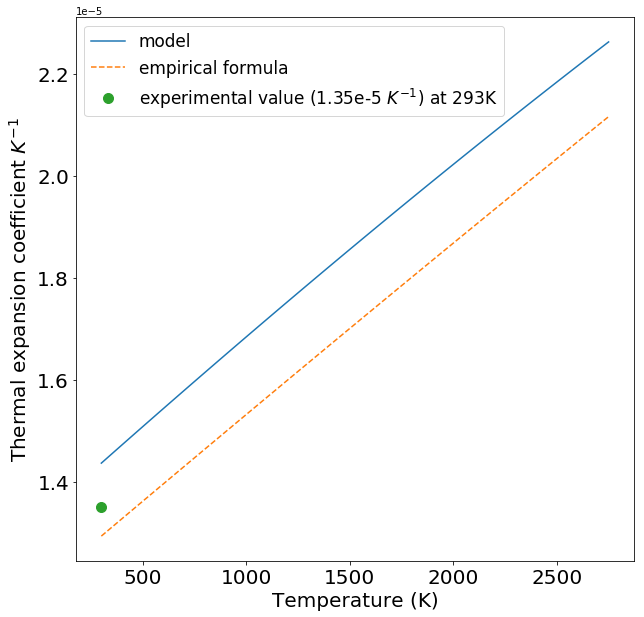

In [101]:
plt.figure(figsize=(10,10))
for i in range(2, 3):
    _ = plt.plot(xt, p_der[i-1](xt)/p_vol[i-1](xt), '-', label='model')
    _ = plt.plot(xt, 3*der_exp(xt)/vol_exp(xt), '--', label='empirical formula')
plt.plot([300.0], [13.5e-6], 'o', label='experimental value (1.35e-5 $K^{-1}$) at 293K', markersize=10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel('Thermal expansion coefficient $K^{-1}$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=17)
plt.savefig(os.path.join(working, 'thermal.png'))

In [ ]:
plt.figure(figsize=(10,10))
xt = np.linspace(t[0], t[-1], 100)
for i in range(1, 4):
    _ = plt.plot(t, vols[:,i], '.')
    _ = plt.plot(xt, pp[i-1](xt), '-')

In [45]:
def pa_root(x):
    r = 256.+1792*x+1120*x**2+112*x**3+x**4
    r /= 1024+1792*x+448*x**2+16*x**3
    #r -= 0.25*(1 - x/0.8)
    return r

In [74]:
def pa_root_b(n):
    m = 1
    r = m**8+28*m**6*n+70*m**4*n**2+28*m**2*n**3+n**4
    r /= 8*m**7+56*m**5*n+56*m**3*n**2+8*m*n**3
    return r

0.25


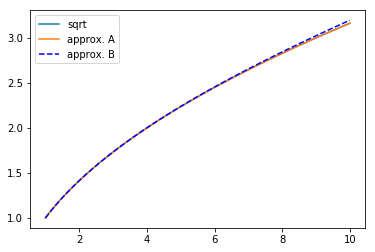

In [82]:
r = np.linspace(1, 10, 1000)
plt.plot(r, np.sqrt(r), label='sqrt')
plt.plot(r, [pa_root(x) for x in r], label='approx. A')
plt.plot(r, [pa_root_b(x) for x in r], 'b--', label='approx. B')
plt.legend()
print(pa_root(0.))